In [1]:
from sklearn import datasets
from sklearn.datasets import make_classification,make_regression,make_blobs
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import pymysql
import pandavro as pdx

2.1 : Loading a Sample Dataset

In [2]:
digits = datasets.load_digits()
features = digits.data
target = digits.target
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Discussion

In [3]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

2.2 : Creating a Simulated Dataset

Regession

In [4]:
features,target,coefficients = make_regression(n_samples=100, 
                                                   n_features=3, 
                                                   n_informative=3, 
                                                   n_targets=1, 
                                                   noise=0.0,
                                                   coef =True, 
                                                   random_state=1)
print('Features: \n', features[:3])
print('Target: \n', target[:3])

Features: 
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target: 
 [-10.37865986  25.5124503   19.67705609]


Classification

In [5]:
features, target = make_classification(n_samples=100,
                                       n_features=3, 
                                       n_informative=3, 
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.25,.75], 
                                       random_state=1)
print('Features: \n', features[:3])
print('Target: \n', target[:3])

Features: 
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target: 
 [1 0 0]


Blobs

In [6]:
features,target = make_blobs(n_samples=100,
                             n_features=2,
                             centers=3,
                             cluster_std=0.5,
                             shuffle=True,
                             random_state=1)
print('Features: \n', features[:3])
print('Target: \n', target[:3])

Features: 
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target: 
 [0 1 1]


Discussion

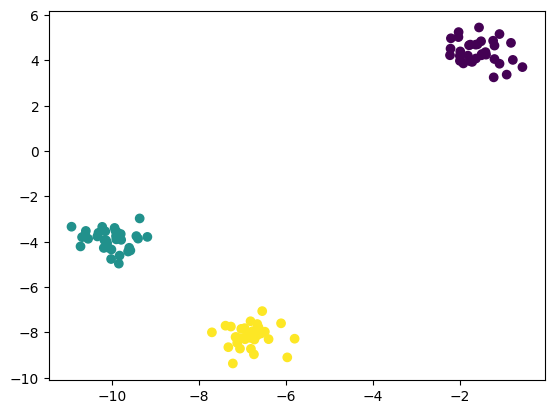

In [7]:
plt.scatter(features[:,0],features[:,1],c=target)
plt.show()

2.3 : Loading a CSV File

In [8]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv'
dataframe = pd.read_csv(url)
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


2.4 : Loading an Excel File

In [9]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'
dataframe = pd.read_excel(url, sheet_name=0,header=0)
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


2.5 : Loading a JSON File

In [10]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'
dataframe = pd.read_json(url,orient='columns')
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


2.6 : Loading a Parquet File

In [11]:
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.parquet'
dataframe = pd.read_parquet(url)
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


2.7 : Loading an Avor File

In [12]:
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro'
r = requests.get(url)
open('data.avro', 'wb').write(r.content)
dataframe = pdx.read_avro('data.avro')
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


2.8 : Querying a SQLite Database

In [13]:
# database_connection = create_engine('sqlite:///sample.db')
# dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)
# dataframe.head(2)

2.9 : Querying a Remote SQL Database

In [14]:
# conn = pymysql.connect(host='localhost', 
#                        user='root', 
#                        password='', 
#                        db='db')
# dataframe = pd.read_sql('SELECT * FROM data', conn)
# dataframe.head(2)

2.10 : Loading Data from a Google Sheet

In [15]:
url = "https://docs.google.com/spreadsheets/d/1ehC-9otcAuitqnmWksqt1mOrTRCL38dv0K9UjhwzTOA/export?format=csv"
dataframe = pd.read_csv(url)
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 0:00:00,0
1,5,2015-01-01 0:00:01,0


2.11 : Loading Data from an S3 Bucket

In [16]:
# s3_url = "s3://machine-learning-python-cookbook/data.csv"
# ACCESS_KEY = 'YOUR_ACCESS_KEY'
# SECRET_KEY = 'YOUR_SECRET_KEY'
# dataframe = pd.read_csv(s3_url, storage_options={
#     "key": ACCESS_KEY, 
#     "secret": SECRET_KEY})
# dataframe.head(2)

2.12 : Loading Unstructured Data

In [17]:
txt_url = "https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt"
r = requests.get(txt_url)
with open('text.txt', 'wb') as f:
    f.write(r.content)
with open('text.txt', 'r') as f:
    text = f.read()
print(text)

Hello there!
